**Loading Libraries**

In [1]:
import pyforest
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

**Question:- 1**

In [2]:
df=pd.read_csv("ds_salaries.csv") #Loading the dataset

<IPython.core.display.Javascript object>

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.size #checking the size of the dataset

41305

In [5]:
df.describe() #descripting the dataset

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
df.isnull().sum() #checking for the null values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df1=df.copy() #copying data in a new dataset to preserve the original data

In [8]:
df1['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [9]:
filtered_df1 = df1[df1['job_title'].isin(['Big Data Architect', 'Data Science Engineer'])] #taking only jobs with 'Big Data Architect' and 'Data Science Engineer

In [10]:
filtered_df1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1229,2023,SE,FT,Big Data Architect,124999,GBP,151902,GB,100,GB,L
1669,2023,SE,FT,Data Science Engineer,140000,USD,140000,US,0,US,M
1670,2023,SE,FT,Data Science Engineer,100000,USD,100000,US,0,US,M
3225,2022,SE,FT,Data Science Engineer,60000,USD,60000,AR,100,MX,L
3525,2021,SE,FT,Data Science Engineer,159500,CAD,127221,CA,50,CA,L


In [11]:
filtered_df1.size # checking the size of the filtered data

77

In [12]:
# calculating the sum of different jobs
total_bt = filtered_df1.loc[filtered_df1["job_title"]=="Big Data Architect", "salary"].sum()
total_dt = filtered_df1.loc[filtered_df1["job_title"]=="Data Science Engineer","salary"].sum()

In [13]:
total_bt #sum of salaries of Big Data Architects

249999

In [14]:
total_dt #sum of salaries of data Science Engineers

493500

In [15]:
total_salary = filtered_df1["salary"].sum()

In [16]:
total_salary # Sum of total salaries

743499

In [17]:
# Calculating percentage
per_bt = (total_bt/total_salary)*100
per_dt = (total_dt/total_salary)*100

In [18]:
# Creating dataset
def compare_profession(per_bt,per_dt):
    data = {
    '% of Total Salary': [per_bt, per_dt]
    }
    row_names = ['per_bt', 'per_dt']
    final = pd.DataFrame(data, index=row_names)
    return final
print(per_bt)
print(per_dt)
result = compare_profession(per_bt,per_dt)

33.62465854022669
66.37534145977332


<IPython.core.display.Javascript object>

In [19]:
result

,% of Total Salary
per_bt,33.624659
per_dt,66.375341


In [20]:
new_data= filtered_df1.sort_values(by='salary').head() #Arraning in ascending order

In [21]:
new_data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3702,2021,MI,FT,Data Science Engineer,34000,EUR,40189,GR,100,GR,M
3225,2022,SE,FT,Data Science Engineer,60000,USD,60000,AR,100,MX,L
1670,2023,SE,FT,Data Science Engineer,100000,USD,100000,US,0,US,M
1229,2023,SE,FT,Big Data Architect,124999,GBP,151902,GB,100,GB,L
3601,2021,SE,FT,Big Data Architect,125000,CAD,99703,CA,50,CA,M


In [22]:
new_data.to_csv('new_data.csv', index=False) #converting to csv

**Question:-2**

In [23]:
dfi=pd.read_csv("iris.csv") #Loading the dataset

<IPython.core.display.Javascript object>

In [24]:
dfi.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
dfi.size

750

In [26]:
dfi.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
dfi.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [28]:
i_var=dfi.drop('species', axis=1)

In [29]:
i_var

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

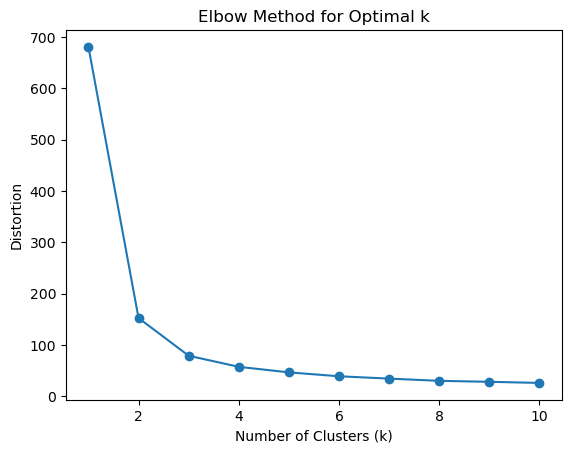

In [30]:
clust = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(i_var)
    clust.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 11), clust, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

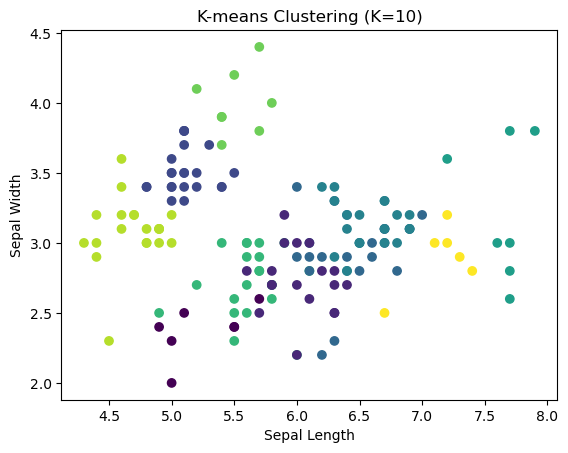

In [31]:
# Visualize the clustering
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(i_var)
    
plt.scatter(i_var['sepal_length'], i_var['sepal_width'],  c=labels)
plt.title(f'K-means Clustering (K={k})')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

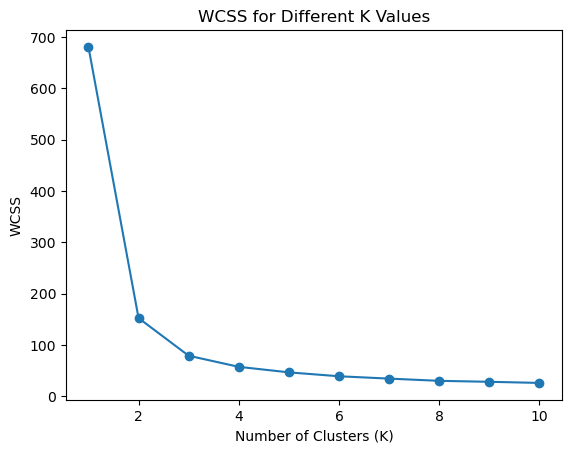

In [32]:
# Iterate over different K values and calculate WCSS
wcss_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(i_var)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss_values, marker='o')
plt.title('WCSS for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [33]:
# Initialize and train the K-means model
kmeans = KMeans(n_clusters=3)
kmeans.fit(i_var)
# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your original DataFrame
i_var['cluster'] = cluster_labels

# Display the updated DataFrame with cluster labels
i_var.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

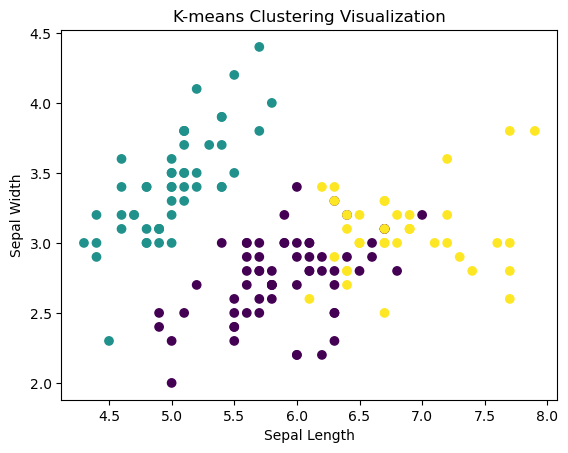

In [34]:
# Visualize the clusters
plt.scatter(i_var['sepal_length'], i_var['sepal_width'], c=i_var['cluster'], cmap='viridis')
plt.title('K-means Clustering Visualization')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

**Question:- 3**

In [35]:
pdt=df = pd.read_csv("card_transdata_fraud.csv") # Loading the Dataset

<IPython.core.display.Javascript object>

In [36]:
df.head()

,distance_from_home,ratio_to_median_purchase_price,fraud
0,57.877857,1.945940,0
1,10.829943,1.294219,0
2,5.091079,0.427715,0
3,2.247564,0.362663,0
4,44.190936,2.222767,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

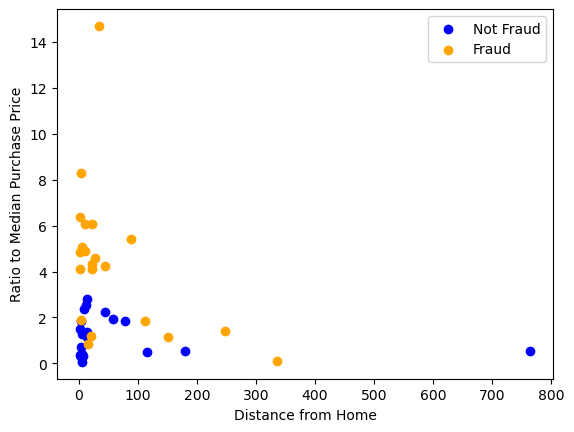

In [37]:
plt.scatter(df[df['fraud'] == 0]['distance_from_home'], df[df['fraud'] == 0]['ratio_to_median_purchase_price'], label='Not Fraud', color='blue')
plt.scatter(df[df['fraud'] == 1]['distance_from_home'], df[df['fraud'] == 1]['ratio_to_median_purchase_price'], label='Fraud', color='orange')
plt.xlabel('Distance from Home')
plt.ylabel('Ratio to Median Purchase Price')
plt.legend()
plt.show()

In [38]:
X = df[['distance_from_home', 'ratio_to_median_purchase_price']]
y = df['fraud']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [41]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_normalized, y_train)
y_pred = knn_classifier.predict(X_test_normalized)

In [42]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_normalized, y_train)
y_pred = knn_classifier.predict(X_test_normalized)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 88.89%
